# DeepVision: Exploiting computer vision techniques to minimize CPU Utilization 

[![](https://img.shields.io/github/license/sourcerer-io/hall-of-fame.svg?colorB=ff0000)](https://github.com/akshaybahadur21/Autopilot/blob/master/LICENSE.txt) 

[![](https://img.shields.io/badge/Akshay-Bahadur-brightgreen.svg?colorB=ff0000)](https://akshaybahadur.com)

This python notebook is for explanation of the core concepts used and the models developed for this webinar.

### Acknowledgement

I would like to extend my gratitude towards Open Data Science Conference, Boston team for giving me this opportunity to showcase my findings especially Alena, Vimal and Rafael.

### Akshay Bahadur

- Software engineer working with Symantec.
- ML Researcher

#### Contact 

- [Portfolio](https://www.akshaybahadur.com/)
- [LinkedIN](https://www.linkedin.com/in/akshaybahadur21/)
- [GitHub](https://github.com/akshaybahadur21)


### Agenda




- Introduction
- Tania's Story
- MNIST 
- Autopilot
- Malaria Detection





### Tania's Story

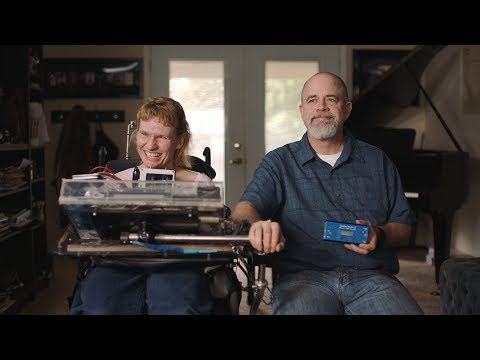

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('Oc_QMQ4QHcw')

## MNIST Digit Recognition

In [11]:
%%HTML
<iframe width="700" height="315" src="https://www.youtube.com/embed/MRNODXrYK3Q"></iframe>

In [12]:
from keras import Sequential
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Dropout
from keras.utils import np_utils, print_summary
from keras.models import load_model

Using TensorFlow backend.


In [67]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [68]:
def showData(x, label):
    pixels = np.array(x, dtype='uint8')

    pixels = pixels.reshape((28, 28))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

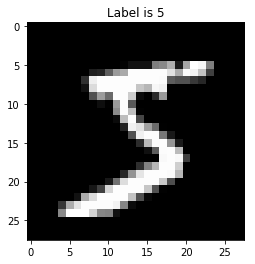

In [69]:
showData(x_train[0], y_train[0])

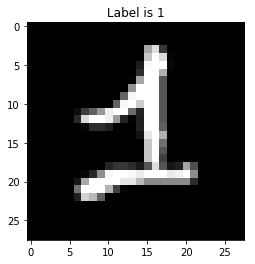

In [70]:
showData(x_train[24], y_train[24])

In [71]:
print(x_train[0].shape)

(28, 28)


In [72]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values


In [73]:
x_train_norm= x_train / 255.
x_test_norm=x_test / 255.

In [74]:
print(x_train_norm[0].shape)

(28, 28)


In [75]:
print(x_train_norm[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [76]:
x_train_norm_mean_zero= x_train / 127.5 - 1.
x_test_norm_mean_zero=x_test / 127.5 - 1.

In [77]:
print(x_train_norm_mean_zero[0].shape)

(28, 28)


In [78]:
print(x_train_norm_mean_zero[0])

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.  

In [79]:
def preprocess_labels(y):
    labels = np_utils.to_categorical(y)
    return labels

In [80]:
y_train = preprocess_labels(y_train)
y_test = preprocess_labels(y_test)

In [81]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], 28, 28, 1)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], 28, 28, 1)

x_train_norm_mean_zero = x_train_norm_mean_zero.reshape(x_train_norm_mean_zero.shape[0], 28, 28, 1)
x_test_norm_mean_zero = x_test_norm_mean_zero.reshape(x_test_norm_mean_zero.shape[0], 28, 28, 1)


In [83]:
print("number of training examples = " + str(x_train.shape[0]))
print("number of test examples = " + str(x_test.shape[0]))
print("X_train shape: " + str(x_train.shape))
print("Y_train shape: " + str(y_train.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [89]:
def keras_model(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

model, callbacks_list = keras_model(28, 28)
print_summary(model)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 22s 371us/step - loss: 12.5177 - acc: 0.2218 - val_loss: 11.3287 - val_acc: 0.2968

Epoch 00001: val_acc improved from -inf to 0.29680, saving model to mnist_odsc.h5


In [91]:
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 19s 323us/step - loss: 1.1754 - acc: 0.6667 - val_loss: 0.3117 - val_acc: 0.9128

Epoch 00001: val_acc improved from 0.29680 to 0.91280, saving model to mnist_odsc.h5


In [92]:
model.fit(x_train_norm_mean_zero, y_train, validation_data=(x_test_norm_mean_zero, y_test), epochs=1, batch_size=64,
              callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 20s 341us/step - loss: 0.9066 - acc: 0.7362 - val_loss: 0.3179 - val_acc: 0.9155

Epoch 00001: val_acc improved from 0.91280 to 0.91550, saving model to mnist_odsc.h5


## Autopilot

This code helps in getting the steering angle of self driving car. The inspiraion is taken from [Udacity Self driving car](https://github.com/udacity/CarND-Behavioral-Cloning-P3) module as well [End to End Learning for Self-Driving Cars](https://devblogs.nvidia.com/deep-learning-self-driving-cars/) module from NVIDIA

The End to End Learning for Self-Driving Cars research paper can be found at (https://arxiv.org/abs/1604.07316)
This repository uses convnets to predict steering angle according to the road. 

1) Autopilot Version 1
2) [Autopilot Version 2](https://github.com/akshaybahadur21/Autopilot/tree/master/Autopilot_V2)


### Code Requirements
You can install Conda for python which resolves all the dependencies for machine learning.

### Description
An autonomous car (also known as a driverless car, self-driving car, and robotic car) is a vehicle that is capable of sensing its environment and navigating without human input. Autonomous cars combine a variety of techniques to perceive their surroundings, including radar, laser light, GPS, odometry, and computer vision. Advanced control systems interpret sensory information to identify appropriate navigation paths, as well as obstacles and relevant signage

## Autopilot V1 (Udacity Dataset based on Udacity Simulator)

### Dataset
You can get the dataset at [here](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip)

## Autopilot V2 (NVIDIA Dataset based on real world)

### Dataset
Download the dataset at [here](https://github.com/SullyChen/driving-datasets) and extract into the repository folder


### References:
 
 - Mariusz Bojarski, Davide Del Testa, Daniel Dworakowski, Bernhard Firner, Beat Flepp, Prasoon Goyal, Lawrence D. Jackel, Mathew Monfort, Urs Muller, Jiakai Zhang, Xin Zhang, Jake Zhao, Karol Zieba. [End to End Learning for Self-Driving Cars](https://arxiv.org/abs/1604.07316)
 - [Behavioral Cloning Project](https://github.com/udacity/CarND-Behavioral-Cloning-P3) 
 - This implementation also took a lot of inspiration from the Sully Chen github repository: https://github.com/SullyChen/Autopilot-TensorFlow  







In [127]:
%%HTML
<iframe width="700" height="315" src="https://www.youtube.com/embed/waLIPYy1Rdk"></iframe>

In [93]:
from __future__ import division
import cv2
import os
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
from itertools import islice

In [94]:
DATA_FOLDER = 'driving_dataset'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')

In [96]:
def showData(x, label):
    img = plt.imread(x)
    pixels = np.array(img, dtype='uint8')

    pixels = pixels.reshape((256, 455,3))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

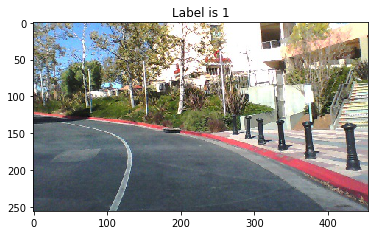

In [97]:
showData("F:\\projects\\SIT_Sample\\AutoPilot\\driving_dataset\\500.jpg",1)

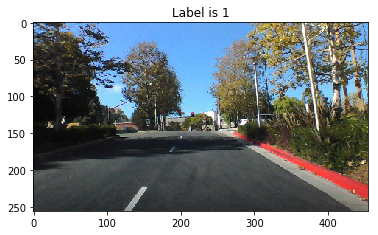

In [115]:
showData("F:\\projects\\SIT_Sample\\AutoPilot\\driving_dataset\\595.jpg",1)

In [103]:
def preprocess(img):
    resized = cv2.resize((cv2.cvtColor(img, cv2.COLOR_RGB2HSV))[:, :, 1], (100, 100))
    return resized

In [104]:
def showData_HSV(x, label):
    img = plt.imread(x)
    img=preprocess(img)
    pixels = np.array(img, dtype='uint8')

    pixels = pixels.reshape((100, 100))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

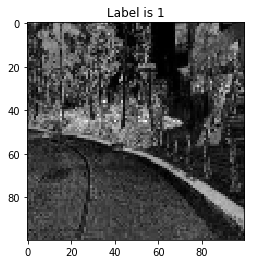

In [105]:
showData_HSV("F:\\projects\\SIT_Sample\\AutoPilot\\driving_dataset\\500.jpg",1)

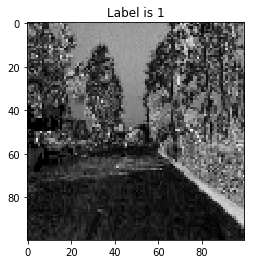

In [116]:
showData_HSV("F:\\projects\\SIT_Sample\\AutoPilot\\driving_dataset\\595.jpg",1)

In [117]:
#Build the model
import numpy as np
from keras.layers import Dense, Activation, Flatten, Conv2D, Lambda
from keras.layers import MaxPooling2D, Dropout
from keras.utils import print_summary
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import keras.backend as K
import pickle

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [119]:
# This excerpt of code collects images and the steering angle, does pre processing and stores in a pickle file
def return_data():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path, angle = line.strip().split()
            full_path = os.path.join(DATA_FOLDER, path)
            X.append(full_path)
            # using angles from -pi to pi to avoid rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)

    for i in range(len(X)):
        img = plt.imread(X[i])
        features.append(preprocess(img))

    features = np.array(features).astype('float32')
    labels = np.array(y).astype('float32')

    with open("features", "wb") as f:
        pickle.dump(features, f, protocol=4)
    with open("labels", "wb") as f:
        pickle.dump(labels, f, protocol=4)

In [120]:
def loadFromPickle():
    with open("features", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels

In [121]:
features, labels = loadFromPickle()

In [190]:
features, labels = shuffle(features, labels)
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,
                                                    test_size=0.3)
train_x = train_x.reshape(train_x.shape[0], 100, 100, 1)
test_x = test_x.reshape(test_x.shape[0], 100, 100, 1)

In [192]:
print("number of training examples = " + str(train_x.shape[0]))
print("number of test examples = " + str(test_x.shape[0]))
print("X_train shape: " + str(train_x.shape))

number of training examples = 31784
number of test examples = 13622
X_train shape: (31784, 100, 100, 1)


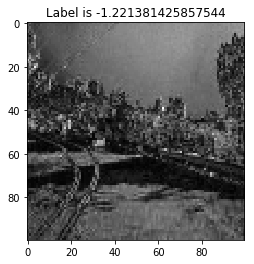

In [128]:
def showLoadedData(x, label):
    pixels = np.array(x, dtype='uint8')

    #pixels = pixels.reshape((100, 100))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()
showLoadedData(train_x[0],train_y[0])

In [162]:
from keras.layers import BatchNormalization,Input
from keras.layers.convolutional import Convolution2D
import tensorflow as tf
from keras.models import Model

def atan(x):
    return tf.atan(x)

In [166]:
#Lets look at the model for the original research paper

def paper_model():
    inputs = Input(shape=(66, 200, 3))
    conv_1 = Convolution2D(24, 5, 5, activation='relu', name='conv_1', subsample=(2, 2))(inputs)
    conv_2 = Convolution2D(36, 5, 5, activation='relu', name='conv_2', subsample=(2, 2))(conv_1)
    conv_3 = Convolution2D(48, 5, 5, activation='relu', name='conv_3', subsample=(2, 2))(conv_2)
    conv_3 = Dropout(.5)(conv_3)

    conv_4 = Convolution2D(64, 3, 3, activation='relu', name='conv_4', subsample=(1, 1))(conv_3)
    conv_5 = Convolution2D(64, 3, 3, activation='relu', name='conv_5', subsample=(1, 1))(conv_4)

    flat = Flatten()(conv_5)

    dense_1 = Dense(1164)(flat)
    dense_1 = Dropout(.5)(flat)
    dense_2 = Dense(100, activation='relu')(dense_1)
    dense_2 = Dropout(.5)(flat)
    dense_3 = Dense(50, activation='relu')(dense_2)
    dense_3 = Dropout(.5)(flat)
    dense_4 = Dense(10, activation='relu')(dense_3)
    dense_4 = Dropout(.5)(flat)

    final = Dense(1, activation=atan)(dense_4)
    model = Model(input=inputs, output=final)
    
    return model

In [167]:
model=paper_model()

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", name="conv_1", strides=(2, 2))`
  """
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", name="conv_2", strides=(2, 2))`
  
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", name="conv_3", strides=(2, 2))`
  import sys
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv_4", strides=(1, 1))`
  # Remove the CWD from sys.path while we load stuff.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv_5", strides=(

In [168]:
print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 66, 200, 3)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 47, 36)        21636     
_________________________________________________________________
conv_3 (Conv2D)              (None, 5, 22, 48)         43248     
_________________________________________________________________
dropout_27 (Dropout)         (None, 5, 22, 48)         0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 3, 20, 64)         27712     
_________________________________________________________________
conv_5 (Conv2D)              (None, 1, 18, 64)         36928     
__________

In [198]:
def keras_model(image_x, image_y):
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(image_x, image_y, 1)))
    model.add(Conv2D(16, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((5,5), padding='valid'))

    model.add(Conv2D(32, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((5,5), padding='valid'))


    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Dense(10))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss="mse")
    filepath = "Autopilot.h5"
    checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [199]:
model, callbacks_list = keras_model(100, 100)
print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_13 (Lambda)           (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 100, 100, 16)      416       
_________________________________________________________________
activation_25 (Activation)   (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 32)        12832     
_________________________________________________________________
activation_26 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 32)          0         
__________

In [195]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=1, batch_size=32,
              callbacks=callbacks_list)

Train on 31784 samples, validate on 13622 samples
Epoch 1/1
 5152/31784 [===>..........................] - ETA: 8:42 - loss: 0.3135

KeyboardInterrupt: 

## Malaria Detection

(142, 163)


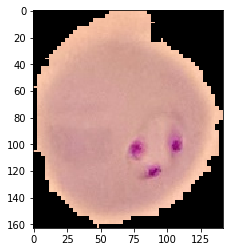

In [220]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
from scipy.misc import imread
import cv2
def showMalariaData(x):
    image = Image.open(x)
    plt.imshow(np.asarray(image), cmap='gray')
    print(image.size)
    plt.show()

showMalariaData("F:\\projects\\\Malaria_Detection\\cell_images\\Parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png")

(100, 94)


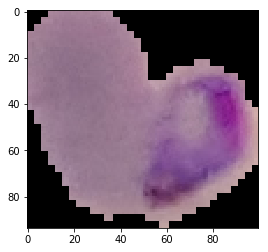

In [222]:
showMalariaData("F:\\projects\\\Malaria_Detection\\cell_images\\Parasitized\\C39P4thinF_original_IMG_20150622_105335_cell_6.png")

(127, 136)


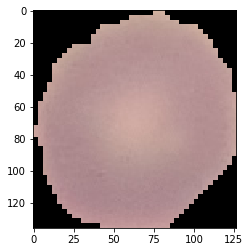

In [223]:
# Let's look at normal cells
showMalariaData("F:\\projects\\\Malaria_Detection\\cell_images\\Uninfected\\C1_thinF_IMG_20150604_104722_cell_60.png")

(121, 148)


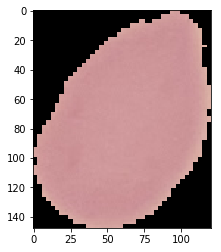

In [224]:
showMalariaData("F:\\projects\\\Malaria_Detection\\cell_images\\Uninfected\\C122P83ThinF_IMG_20151002_145014_cell_158.png")

69438


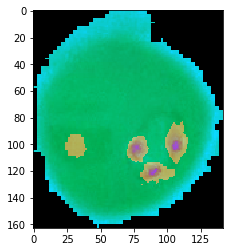

In [231]:
# Let's add some filters and see if we can remove some noise
def showMalariaFiltered_HLS_Data(x):
    image = Image.open(x)
    image=np.asarray(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    plt.imshow(hsv, cmap='gray')
    print(hsv.size)
    plt.show()

showMalariaFiltered_HLS_Data("F:\\projects\\\Malaria_Detection\\cell_images\\Parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png")

51816


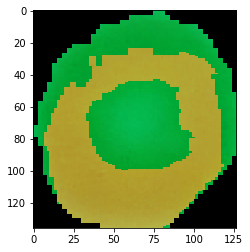

In [232]:
showMalariaFiltered_HLS_Data("F:\\projects\\\Malaria_Detection\\cell_images\\Uninfected\\C1_thinF_IMG_20150604_104722_cell_60.png")

In [233]:
def showMalariaFiltered_HSV_Data(x):
    image = Image.open(x)
    image=np.asarray(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    plt.imshow(hsv, cmap='gray')
    print(hsv.size)
    plt.show()

69438


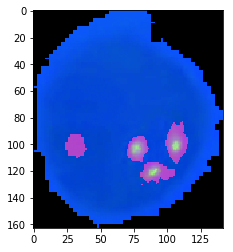

In [234]:
showMalariaFiltered_HSV_Data("F:\\projects\\\Malaria_Detection\\cell_images\\Parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png")

51816


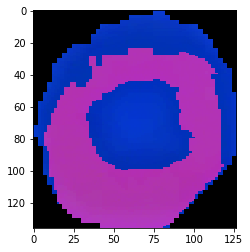

In [235]:
showMalariaFiltered_HSV_Data("F:\\projects\\\Malaria_Detection\\cell_images\\Uninfected\\C1_thinF_IMG_20150604_104722_cell_60.png")

In [236]:
def showMalariaFiltered_LAB_Data(x):
    image = Image.open(x)
    image=np.asarray(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    plt.imshow(hsv, cmap='gray')
    print(hsv.size)
    plt.show()

69438


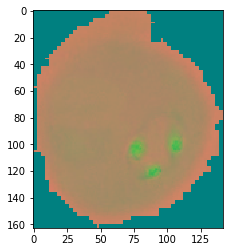

In [237]:
showMalariaFiltered_LAB_Data("F:\\projects\\\Malaria_Detection\\cell_images\\Parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png")

51816


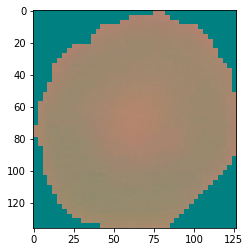

In [238]:
showMalariaFiltered_LAB_Data("F:\\projects\\\Malaria_Detection\\cell_images\\Uninfected\\C1_thinF_IMG_20150604_104722_cell_60.png")